In [2]:
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

# Data

28
False


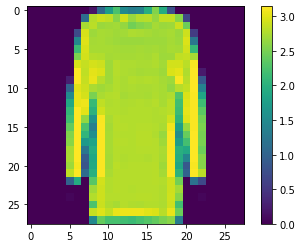

In [144]:
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')

images = (images/0.00392156862745098)*np.pi

print(len(images[0]))
test = 1006
plt.imshow(images[test])
print(labels[test])
plt.colorbar()
plt.show()

#28x28 parameters?
# Binary classification (4(2x2) or 16(4x4) qubits)
# Find the t-shirt (fun fact 52 label)
#0.00392156862745098, 0.00392156862745098

# parity post processing

# Data Loading

In [ ]:
#definition of three functions.
def encoder():# image as input
    
    qcircuit = QuantumCircuit(2,2) # no more than 16 qubits. Try the performance using many qubits requirements.
    
    return qcircuit

def decoder():
    
    return 1 #image

def run_part1():
    
    return 1



# Tests

In [269]:
import tensorflow as tf

size = np.array([2,2])
area = size[0]*size[1]
select_image = 6 # from 0 to 2000

images2 = images
print("The shape of the images is: {}".format(images2.shape))
images2 = images2.reshape(images2.shape[0], *(28,28,1))

images2 = tf.image.resize(images2, (size[0],size[1])).numpy()
print("The shape of the images is: {}".format(images2.shape))

The shape of the images is: (2000, 28, 28)
The shape of the images is: (2000, 2, 2, 1)


Image before:


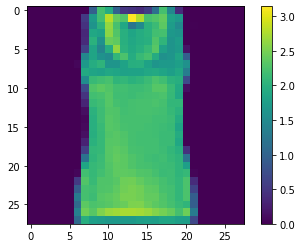

In [262]:
print("Image before:")
plt.imshow(images[select_image])
plt.colorbar()
plt.show()

Image then:


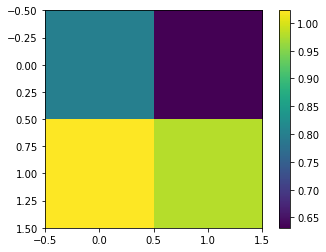

In [263]:
print("Image then:")
plt.imshow(images2[select_image])
plt.colorbar()
plt.show()

In [271]:
# Flateing
images2 = images2.reshape(images2.shape[0], *(1,area,1))

In [267]:
from qiskit.circuit import ParameterVector, QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

In [272]:
# define your parameters
p = ParameterVector('p', area) 

In [277]:
qc = QuantumCircuit(area)

for i in range(area):
    qc.rx(p[i],i)

# bind parameters
for i in range(area):
    qc = qc.bind_parameters({p[i]:images2[select_image][0][i][0]})

qc.measure_all()
qc.draw()

┌───────────────────────┐ ░ ┌─┐         
   q_0: ┤ Rx(0.800798058509827) ├─░─┤M├─────────
        ├───────────────────────┤ ░ └╥┘┌─┐      
   q_1: ┤ Rx(0.631398558616638) ├─░──╫─┤M├──────
        └┬──────────────────────┤ ░  ║ └╥┘┌─┐   
   q_2: ─┤ Rx(1.02255761623383) ├─░──╫──╫─┤M├───
        ┌┴──────────────────────┤ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ Rx(0.979437708854675) ├─░──╫──╫──╫─┤M├
        └───────────────────────┘ ░  ║  ║  ║ └╥┘
meas: 4/═════════════════════════════╩══╩══╩══╩═
                                     0  1  2  3

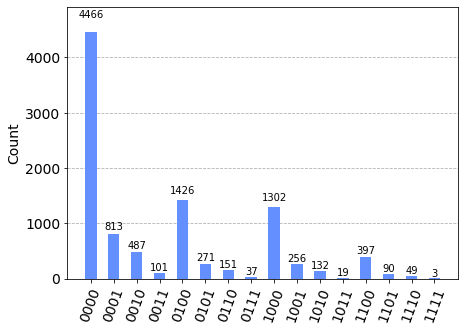

In [275]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=10000)

res = job.result().get_counts(qc)

plot_histogram(res)

In [276]:
res

{'1111': 3,
 '1011': 19,
 '1100': 397,
 '0100': 1426,
 '0000': 4466,
 '0010': 487,
 '1000': 1302,
 '0110': 151,
 '1101': 90,
 '1010': 132,
 '1001': 256,
 '0101': 271,
 '1110': 49,
 '0001': 813,
 '0111': 37,
 '0011': 101}